# Normalized Spectral Clustering

In [1]:
# OS packages
import pathlib
import os

# Scientific packages
import numpy as np
import networkx as nx
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

First need to designate the path where our data set lives

In [2]:
home_dir = "/c/Users/thsiao3/Documents/emory_class/MATH789/hw1"
home_dir = pathlib.Path(home_dir)
os.chdir(home_dir)

In [3]:
# Importing the two custom modules from Problem 1 and 2 (saved in the home_dir specified above)
import normalizedSpectralClustering as spectralcluster
import getAdjacencyMatrixKNN as adjmatrix

In [4]:
data1_path = home_dir / "data/hw1data1.mat"
Y = scipy.io.loadmat(data1_path)["Y"]

In [6]:
# Set hyperparameters
k = 60
sigma = 5
neigs = 2

A, W = adjmatrix.getAdjacencyMatrixKNN(Y, k=k, sigma=sigma, is_data1=True)
C, labels, E, eigs = spectralcluster.normalizedSpectralClustering(W, nc=3, neigs=neigs)

We want to observe the results of our clustering algorithm by visualizing 1) the clusters assigned to each point and 2) the edges of our adjacency matrix

In [8]:
rows, cols, v = scipy.sparse.find(scipy.sparse.triu(A)) # Location of nonzero elements (edges)
pos = Y.T #coordinates
connects = [(i, j) for i, j in zip(rows, cols)] #edges

#creation of the graph
graph = nx.Graph()
#adding nodes/connections in the graph
for node in range(len(pos)):
    graph.add_node(node)
graph.add_edges_from(connects)

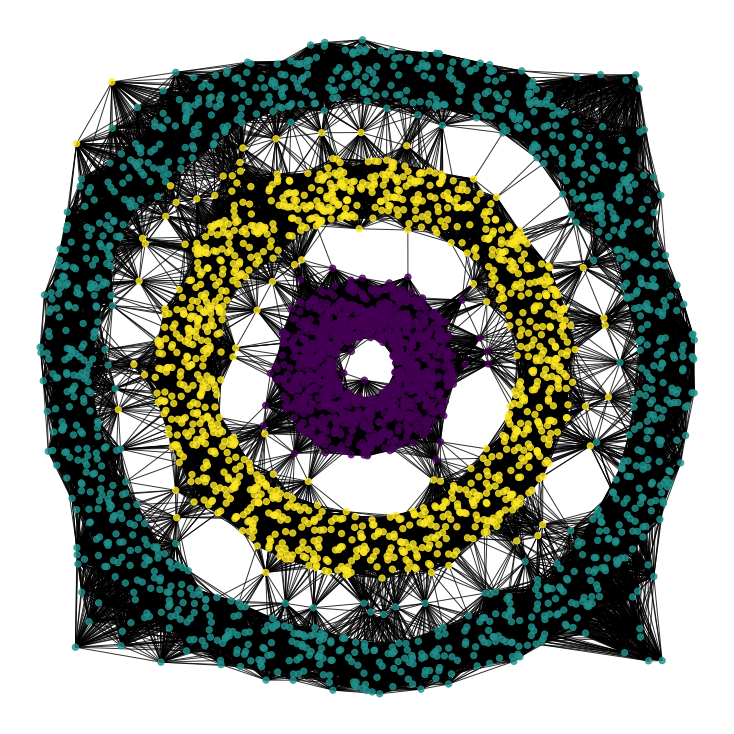

In [9]:
#plot of the nodes using the (x,y) pairs as coordinates
plt.figure(figsize=(10,10))
nx.draw(graph, [(x,y) for x,y in pos], node_size=40, alpha=0.8, node_color=labels)

When the number of neighbors exceeded around 70, values of sigma tended to not matter too much and the clustering visually appears to do quite well. 
However, I was mostly concerned with the points at the very outer edges. At $k=50$ with a low $\sigma=1$, the points near the four corners, 
which one would expect to be the the same cluster as the outermost circle, were being classified consistently the same as the second circle in the middle. 
Therefore, I tried to pick a $k$ that was as low as possible with a $\sigma$ that made sure the rings were mostly clustered 
correctly, while also making sure points in the four corners were not being classified as the second group, which seems 
ridiculous. I ended on $k=60$ and $\sigma=5$. The top left corner still has two points that get clustered the same as the second circle, but makes sense due to the larger number of points in between the second and third rings compared to the other areas of the grid. 

We can also plot the two eigenvectors used to perform the actual K-means clustering. The first eigenvector is $D^{-1/2}\mathbb{1}$ associated with the 0 eigenvalue, and doesn't offer much discriminatory power. However the Fiedler vector in this case offers great separation.

Text(0, 0.5, 'Eigenvector 2')

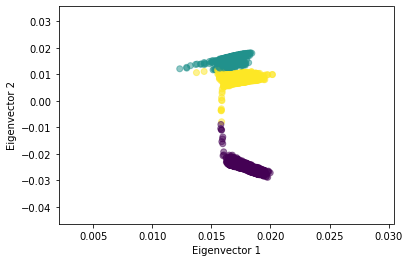

In [10]:
plt.scatter(E[:,0], E[:,1], c=labels, alpha=0.5)
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")